<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-112: Φυσική Ι
## Χειμερινό Εξάμηνο 2023-2024
### Διδάσκων: Γ. Καφεντζής
    
## Ανάθεση: 26 Οκτωβρίου 2023
## Παράδοση: 5 Νοεμβρίου 2023, 23:59:59
(ο τρόπος παράδοσης βρίσκεται στο τέλος του αρχείου αυτού)

Σε αυτο το τρίτο "εργαστήριο" του μαθήματος θα συζητήσουμε (α) θέματα μετρήσεων δυνάμεων, (β) τη δύναμη τριβής, και (γ) τη δύναμη της Παγκόσμιας Έλξης!

Σε κάθε πρόγραμμα Python που γράφουμε, στις πρώτες γραμμές εισάγουμε όποιες βιβλιοθήκες σκοπεύουμε να χρησιμοποιήσουμε. 

Ας ξεκινήσουμε εισάγοντας τις γνωστές μας βιβλιοθήκες, και κάποιες βολικές συντομεύσεις τους. Εκτελέστε το παρακάτω κομμάτι κώδικα επιλέγοντάς το και πατώντας Shift + Enter.

In [1]:
import numpy as np                     # βιβλιοθήκη numpy, θα τη "φωνάζουμε" ως np στο εξής
import matplotlib.pyplot as plt        # θέλουμε μόνο την pyplot συνάρτηση της βιβλιοθήκης matplotlib και θα τη "φωνάζουμε" plt
import pandas as pd                    # μια καινούρια βιβλιοθήκη με πολύ χρήσιμες συναρτήσεις για ανάγνωση αρχείων
%matplotlib inline                     

# Άσκηση Python 1

Στη θεωρία μελετήσαμε **σταθερές** δυνάμεις και τους νόμους του Newton που τις κυβερνούν. Όπως καταλαβαίνετε, η θεωρία που μαθαίνουμε είναι πολύ χρήσιμη για να μοντελοποιούμε φαινόμενα αλλά η πράξη συνήθως απέχει αριθμητικά από τα αποτελέσματα που μπορούμε να προβλέψουμε στο χαρτί μας. Ένας λόγος αυτής της απόστασης μεταξύ θεωρίας και πράξης είναι τα **σφάλματα μέτρησης**.

Στο αρχείο $\textrm{varforce.csv}$ σας δίνονται $50$ χρονικές στιγμές και η τιμή σε Newton μιας **γραμμικά αυξανόμενης με την πάροδο του χρόνου** δύναμης σε κάθε μια από αυτές τις χρονικές στιγμές. Το πρόβλημα είναι ότι το μηχάνημα μέτρησής που χρησιμοποιήσαμε είναι φοβερά **ελαττωματικό** και οι μετρήσεις μας έχουν μεγάλο σφάλμα!!! 😃

Ας τις δούμε, χρησιμοποιώντας τη συνάρτηση $\textrm{read\_csv}$.

In [ ]:
data = pd.read_csv('varforce.csv', header = None, sep=',', names=['time (s)', 'force (N)'])
data

Η πρώτη στήλη απλά αριθμεί κάθε γραμμή, η δεύτερη στήλη περιέχει τις χρονικές στιγμές που λήφθηκαν οι μετρήσεις, και η τρίτη στήλη αποτελεί τις αριθμητικές τιμές της δύναμης $F$.

Ας κάνουμε τη γραφική παράσταση αυτών των τιμών.

In [ ]:
t = data.loc[:, 'time (s)']       # παίρνουμε τη στήλη με όνομα 'time (s)'
F = data.loc[:, 'force (N)']      # παίρνουμε τη στήλη με όνομα 'force (N)'
plt.figure(figsize=(8,6)) 
plt.plot(t, F, 'ko')              # τυπώνουμε το γράφημα
plt.grid()
plt.xlabel('Χρόνος (s)')
plt.ylabel('Δύναμη (N)')

Βλέπετε ότι οι μετρήσεις ακολουθούν οτιδήποτε άλλο εκτός από γραμμική σχέση! 😃

Γνωρίζουμε όμως ότι η μέτρηση αφορούσε μια δύναμη της μορφής $F=\lambda t + \beta$, αλλά δυστυχώς δε γνωρίζουμε τα $\lambda, \beta$. Τι μπορούμε να κάνουμε γι' αυτό?

Μια απάντηση θα ήταν να σχεδιάσουμε την ευθεία που "ταιριάζει" καλύτερα στα σημεία που μετρήσαμε. Όμως καθένας/καθεμιά από σας θα σχεδιάζε μια διαφορετική ευθεία, ανάλογα με τις προτιμήσεις του ματιού του/της. Χρειαζόμαστε κάτι καλύτερο!

Μπορούμε να υποθέσουμε ότι η ευθεία μοντελοποιείται ως

$$y = \mu t + c$$

και αναζητούμε έναν τρόπο να εκτιμήσουμε τις σταθερές $\mu, c$. Αυτό σημαίνει ότι η δύναμη θα ακολουθεί το μοντέλο 

$$F = \mu t + c$$

Ας βάλουμε τέσσερις τυχαίες τιμές σε αυτές τις σταθερές και ας δούμε τι παιρνουμε.

In [ ]:
mu1, c1 = 1.2, 0.01
mu2, c2 = 0.9, 0.5

plt.figure(figsize=(8,6)) 
plt.plot(t, F, 'ko') 
plt.plot(t, mu1*t + c1, 'b')
plt.plot(t, mu2*t + c2, 'r')
plt.xlabel('Χρόνος (s)')
plt.ylabel('Δύναμη F (N)')

Παρατηρήστε ότι και οι δυο ευθείες φαίνεται πως θα μπορούσαν να είναι κατάλληλες περιγραφές για τη γραμμική δύναμη που ψάχνουμε! Ταιριάζουν "στο μάτι" με τα δεδομένα μας!

Χρειαζόμαστε όμως έναν αντικειμενικό τρόπο για να βρούμε την "καλύτερη" ευθεία, αυτή δηλαδή που ταιριάζει στις "κακές" μετρήσεις μας με βάση κάποιο κριτήριο.

Μια πολύ διάσημη μέθοδος είναι η μέθοδος των **ελαχίστων τετραγώνων** και είναι φοβερά απλη: για κάθε ευθεία που σχεδιάζουμε, υπολογίζουμε την κατακόρυφη απόσταση της από κάθε σημείο που αποτελεί μια μέτρηση, υψώνουμε την απόσταση αυτή στο τετράγωνο και τις αθροίζουμε!! Δείτε αυτές τις κατακόρυφες αποστάσεις (που πρακτικά είναι το **σφάλμα** της μέτρησής μας σε σχέση με την ευθεία) σε ένα διαφορετικό παράδειγμα (με μπλε χρώμα) στο παρακάτω σχήμα.

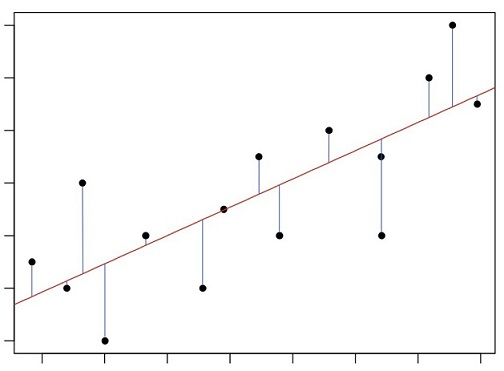

Κριτήριό μας λοιπόν θα είναι η κατακόρυφη απόσταση των μετρήσεών μας από την ευθεία: η "καλύτερη" ευθεία θα είναι αυτή με το ελάχιστο άθροισμα των τετραγώνων των κατακόρυφων αποστάσεων! 😃 

Μαθηματικά, για τα $N=50$ ζεύγη $\left(t(i), F(i)\right), \: i=1,\cdots, 50$ που έχουμε μετρήσει, θέλουμε να ελαχιστοποιήσουμε την ποσότητα

$$\sum (μοντέλο\_ευθείας - μετρήσεις)^2 = \sum_{i=1}^{N}(\mu t(i) + c - F(i))^2$$

με $N$ το πλήθος των μετρήσεων (στην περίπτωσή μας, $N=50$).

Αν "βαφτίσουμε" αυτήν την ποσότητα ως $Error(\mu,c)$, τότε μπορούμε να βρούμε την ελάχιστη τιμή της αν θέσουμε την παράγωγό της ως προς $\mu$ και ως προς $c$ ίση με το μηδέν, και να λύσουμε τις εξισώσεις!! Θα αναφέρουμε απλά τη διαδικασία, συνοπτικά, αφαιρώντας την απλή αλλά βαρετή άλγεβρα (την οποία όμως σας συστήνω να δοκιμάσετε σε μια κόλλα χαρτί):

\begin{align}
\frac{d}{d\mu}Error(\mu,c) &= 0 \nonumber \\
\mu \sum_{i=1}^N t(i)^2 + c\sum_{i=1}^{N}t(i) - \sum_{i=1}^N t(i)F(i) &= 0 \nonumber \\
\end{align}

και 

\begin{align}
\frac{d}{dc}Error(\mu, c) &= 0 \nonumber \\
\mu\sum_{i=1}^N t(i) + cN - \sum_{i=1}^N F(i) &= 0 \nonumber 
\end{align}

Λύνοντας το σύστημα $2$ x $2$, καταλήγουμε στις σχέσεις

$$\mu = \displaystyle \frac{\frac{1}{N}\sum_{i=1}^N t(i)F(i) - \frac{1}{N}\sum_{i=1}^N t(i)\frac{1}{N}\sum_{i=1}^N F(i)}{\frac{1}{N}\sum_{i=1}^N t(i)^2 - \left(\frac{1}{N}\sum_{i=1}^N t(i)\right)^2} $$

και 

$$c = \frac{\frac{1}{N}\sum_{i=1}^N t(i)^2 \frac{1}{N}\sum_{i=1}^N F(i) - \frac{1}{N}\sum_{i=1}^N t(i)\frac{1}{N}\sum_{i=1}^N t(i)F(i)}{\frac{1}{N}\sum_{i=1}^N t(i)^2 - \left(\frac{1}{N}\sum_{i=1}^N t(i)\right)^2}$$

Ο συμβολισμός

$$\sum_{x=1}^N f(x) = f(1) + f(2) + \cdots + f(N)$$

σημαίνει απλά ότι αθροίζουμε όλες της τιμές της $f$ για $x=1$ ως $x=N$, με $x$ ακέραιο. Μην ανησυχείτε, η Python έχει έτοιμη συνάρτηση!

Βλέπετε ότι οι σταθερές $\mu, c$ εξαρτώνται μόνο από τις μετρήσεις μας για τη δύναμη $F$ και τις χρονικές στιγμές $t(i)$ που αυτές πάρθηκαν!

* * *

## Ζητούμενο:

Παρακάτω σας δίνονται έτοιμες κάποιες βοηθητικές συναρτήσεις που υπολογίζουν αθροίσματα που βρίσκονται στους αριθμητές και παρονομαστές των τύπων για τον υπολογισμό των $\mu, c$. Αναγνωρίστε ποιό άθροισμα υλοποιεί η κάθε συνάρτηση και σημειώστε το σε ένα χαρτί για δική σας ευκολία. 

In [8]:
def E_1(t):
    N = len(t)
    return (1/N)*np.sum(t)

def E_2(F):
    N = len(F)
    return (1/N)*np.sum(F)

def E_3(t):
    N = len(t)
    return (1/N)*np.sum(t**2)

def E_4(t,F):
    N = len(t)
    return (1/N)*np.sum(t*F)

Συμπληρώστε την παρακάτω συνάρτηση που υλοποιεί τη μέθοδο των ελαχίστων τετραγώνων, δηλ. βρίσκει τις τιμές $\mu$, $c$ με βάση τις σχέσεις που καταλήξαμε παραπάνω:

In [9]:
def my_least_squares(t, F):
    # Συνάρτηση που υπολογίζει τους συντελεστές μ και c της
    # ευθείας ελαχίστων τετραγώνων που ταιριάζει στα δεδομένα μας
    # μεταβλητή t: χρονικές στιγμές υπολογισμού της δύναμης F
    # μεταβλητή F: μέτρο δύναμης F σε κάθε χρονική στιγμή του διανύσματος χρόνου t
    # Επιστρέφει:
    #   - τιμή μ
    #   - τιμή c

    # Γράψτε τον κώδικά σας εδώ
    
    return mu, c
# Τέλος κώδικα

Ας απεικονίσουμε ξανά τα σημεία και την ευθεία που μας δίνει η μέθοδος των ελαχίστων τετραγώνων.

In [ ]:
mu, c = my_least_squares(t, F)
print('μ = {}, c = {}'.format(mu, c))  # θα πρέπει να πάρετε τις τιμές
                                       # μ = 0.948828630626524, 
                                       # c = 0.114775622516948

plt.figure(figsize=(8,6)) 
plt.plot(t, F, 'ro') 
plt.plot(t, mu*t + c, 'b')
plt.grid()
plt.xlabel('Χρόνος (s)')
plt.ylabel('Δύναμη F (N)')

Από τις τιμές των $\mu, c$ καταλαβαίνουμε ότι η δύναμη που μετρήσαμε εκτιμάται ως 

$$F = 0.94t + 0.11$$

**Plot twist**: οι μετρήσεις πάρθηκαν από την ευθεία $F = t$, αλλά σε αυτή προστέθηκε τυχαίος θόρυβος ώστε να προσομοιωθεί το σφάλμα. Άρα η προσέγγισή μας είναι αρκετά καλή! 

---
---

# Άσκηση Python 2

Στην άσκηση αυτή, ας υποθέσουμε ότι έχετε $50$ βιβλία στη βιβλιοθήκη σας. Καθένα από αυτά έχει μάζα $m$. 

Θέλετε να μελετήσετε πόση βαρυτική δύναμη απαιτείται να ασκηθεί πάνω στο βιβλίο όταν αυτό βρίσκεται σε ένα επικλινές γωνίας $\theta$, το οποίο έχει συντελεστή στατικής τριβής $\mu_s$. Με άλλα λόγια, θέλετε να μάθετε πόση είναι η **μέγιστη δύναμη στατικής τριβής** έτσι ώστε το κάθε βιβλίο **μόλις** να αρχίσει να ολισθαίνει στο επικλινές!

Για να μη σας βάλω στη διαδικασία να βρείτε και να ζυγίσετε τα βιβλία σας 😃, σας δίνεται ένα αρχείο $\textrm{books\_data.csv}$ που περιέχει

1. τη μάζα κάθε βιβλίου (μεταξύ $0.5$ και $5$ kg)
2. τη γωνία που θα έχει το κεκλιμένο για το συγκεκριμένο βιβλίο (μεταξύ $0$ και $\pi/2$)
3. το συντελεστή στατικής τριβής του κεκλιμένου (διάφορες τιμές μεταξύ $0.1$ και $0.9$)

Ας απεικονίσουμε την κατάσταση όταν το βιβλίο είναι έτοιμο να ολισθήσει.

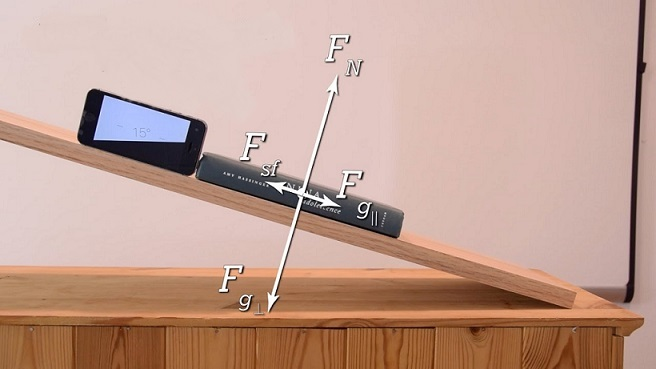

Θεωρώντας το βιβλίο ως σωματίδιο, παρατηρήστε τις τέσσερις δυνάμεις που ασκούνται στο βιβλίο (με αρκετά διαφορετικό συμβολισμό από αυτόν που ακολουθούμε στην τάξη αλλά τι να κάνουμε, η φωτογραφία ήταν ωραία 😃).

1. τη δύναμη στατικής τριβής $F_{sf}$ - τη συμβολίζουμε ως $f_s$ στη θεωρία
2. τη $x-$συνιστώσα του βάρους, $F_{g_{||}}$ - τη συμβολίζουμε ως $F_{g_x}$ στη θεωρία
3. την $y-$συνιστώσα του βάρους, $F_{g_{\perp}}$ - τη συμβολίζουμε ως $F_{g_y}$ στη θεωρία
4. την κάθετη δύναμη από το επικλινές στο βιβλίο, $F_N$ - τη συμβολίζουμε ως $n$ στη θεωρία

Το βιβλίο ολισθαίνει όταν $F_{sf} < F_{g_{||}}$ αλλά μας ενδιαφέρει τι συμβαίνει όταν είναι **έτοιμο να ολισθήσει**. Ας αναλύσουμε το πρόβλημα κατά άξονες:

Στον άξονα $x'x$ - παράλληλος με το κεκλιμένο - το βιβλίο ισορροπεί οριακά. Ισχύει ο 1ος νόμος του Newton: 

$$\Sigma \vec{F}_x = 0 \Longleftrightarrow F_N = F_{g_{\perp}} \Longleftrightarrow F_N = mg\cos(\theta)$$

Όμως ξέρουμε ότι 

$$F_{sf} = \mu_s F_N$$

και αντικαθιστώντας παίρνουμε

$$F_{sf} = \mu_s mg \cos(\theta)$$

Ας δούμε τα βιβλία που έχουμε καταγράψει και τα στοιχεία που τα συνοδεύουν:

In [ ]:
data_books = pd.read_csv('books_data.csv', \
                         header = None, sep=',', \
                         names=['mass (kg)', 'theta (rad)', 'mu_s'])
data_books

---

## Ζητούμενο:

Γράψτε μια συνάρτηση που υπολογίζει τη δύναμη στατικής τριβής που ασκείται στο βιβλίο όταν είναι έτοιμο να ολισθήσει, και εφαρμόστε τη σε κάθε ένα από τα $50$ βιβλία σας!

Συμπληρώστε τον παρακάτω κώδικα.

In [15]:
def friction_force_slide(mass, theta, mu_s):
    # Συνάρτηση που υπολογίζει τη δύναμη στατικής τριβής που ασκείται στο βιβλίο όταν
    # είναι έτοιμο να ολισθήσει
    # μεταβλητή mass: μάζα βιβλίου
    # μεταβλητή theta: γωνία κεκλιμένου
    # μεταβλητή mu_s: συντελεστής στατικής τριβής
    # Επιστρέφει:
    #   - δύναμη στατικής τριβής fs

    g = 9.8
    # Γράψτε εδώ τον κωδικά σας
    
    return fs
# Τέλος κώδικα

Ας εφαρμόσουμε την παραπάνω συνάρτηση στα δεδομένα μας:

In [16]:
fs = []

for i in range(0,len(data_books)):
    mass, theta, mu_s = data_books.iloc[i,0], \
    data_books.iloc[i,1], \
    data_books.iloc[i,2]
    static_friction = # συμπληρώστε εδώ
    fs.append(static_friction)   # μαζεύουμε τα αποτελέσματα σε μια λίστα

Τώρα μπορούμε να εισάγουμε μια νέα στήλη με όνομα $\textrm{static friction}$ στη δομή δεδομένων μας και να δούμε συνολικά τι έχει συμβεί.

In [ ]:
data_books.insert(len(data_books.columns), 'static friction (N)', fs)

data_books

Ελέγξτε τις γραμμές $9$ και $11$ και σχολιάστε τι συμβαίνει σε αυτά τα δυο πειράματα όσον αφορά τη μάζα κάθε βιβλίου, τη γωνία του κεκλιμένου, το συντελεστή στατικής τριβής, και τη δύναμη στατικής τριβής που απαιτείται για να ολισθήσει το κάθε βιβλίο στο κεκλιμένο. Το σχόλιό σας να γραφεί στο παρακάτω κελί, κάτω από τη λέξη "Απάντηση" (κάνετε διπλό κλικ στο κελί για να μπορέσετε να γράψετε).

### Απάντηση:

---
---

# Άσκηση Python 3

Παρόλο που στη θεωρία γνωρίσαμε τη δύναμη του βάρους $\vec{F}_{g}$ η οποία ασκείται σε ένα σώμα από τη Γη (και από τον 3ο νόμο του Newton, θα πρέπει και το σώμα να ασκεί μια δύναμη ίσου μέτρου και αντίθετης φοράς επάνω στη Γη), δε μελετήσαμε βαρυτικές αλληλεπιδράσεις ανάμεσα σε σώματα (όπως είναι για παράδειγμα τα $\textrm{πλανητικά}$ σώματα, αν και η θεωρία που θα συζητήσουμε γενικεύεται για κάθε σώμα). 

Μπορούμε να εξετάσουμε λοιπόν σε αυτό το εργαστήριο τον περίφημο **Νόμο της Παγκόσμιας Έλξης**, ο οποίος δηλώνει ότι **οι ελκτικές δυνάμεις μεταξύ δύο ουρανίων σωμάτων είναι ανάλογες του γινομένου των μαζών τους και αντιστρόφως ανάλογες του τετραγώνου της μεταξύ των κέντρων μάζας τους απόστασης**. Με απλά μαθηματικά, ένα σώμα μάζας $m_1$ ασκεί ελκτική δύναμη σε ένα σώμα μάζας $m_2$ το οποίο βρίσκεται σε απόσταση $r$ από το πρώτο, η οποία δίνεται ως:

$$F_{g} = G\frac{m_1 m_2}{r^2}$$

με $G$ τη σταθερά της Παγκόσμιας Έλξης, $G=6.67428 \times 10^{{-11}} \, \frac{Nm^2}{kg^2}$, τις μάζες σε $kg$, και τη μεταξύ τους απόσταση σε $m$. Την ίδια ακριβώς δύναμη σε μέτρο αλλά αντίθετης φοράς ασκεί το σώμα μάζας $m_2$ στο σώμα μάζας $m_1$.

Υποθέστε ότι δυο σώματα μάζας $m_1$, $m_2$ βρίσκονται σε άξονα $x'x$. Το πρώτο σώμα μάζας $m_1$ βρίσκεται στο σημείο αναφοράς του άξονα, δηλ. στο $0$, ενώ το δεύτερο σώμα μάζας $m_2$ βρίσκεται σε απόσταση $L$ από το σημείο αναφοράς. Με βάση όσα αναφέραμε, τα δυο σώματα θα δεχθούν ελκτικές δυνάμεις, το καθένα από το άλλο, με μέτρο $F_g$ και αντίθετες μεταξύ τους φορές. Ας υποθέσουμε ότι τα δυο σώματα είναι "δεμένα" στις θέσεις τους, δηλ. δεν πρόκειται να κινηθούν από τις ελκτικές δυνάμεις που αναπτύσσονται. 

Ας τοποθετήσουμε ένα τρίτο σώμα μάζας $m_3$ σε μια τυχαια θέση ανάμεσα στα δυο πρώτα. Έστω $x$ αυτή η απόσταση από το σημείο αναφοράς για το σώμα μάζας $m_3$. Ξανά με βάση όσα είπαμε, θα αναπτυχθεί μια δύναμη $\vec{F}_{13}$ και μια δύναμη $\vec{F}_{23}$, λόγω των δυο σωμάτων μάζας $m_1$, $m_2$, όπως στο Σχήμα.

![masses](./particles.png)

Θέλουμε να βρούμε τη θέση $x$ που το σώμα $m_3$ ισορροπεί. Θεωρούμε θετική φορά τη συμβατική (δεξιά). Για να ισορροπεί το σώμα μάζας $m_3$ πρέπει να ισχύει:

$$\Sigma \vec{F}_x = \vec{0} \Longleftrightarrow \vec{F}_{13} + \vec{F}_{23} = \vec{0} \Longrightarrow F_{23} - F_{13} = 0 \Longrightarrow F_{23} = F_{13}$$

Ισοδύναμα,

$$G\frac{m_2m_3}{(L-x)^2} = G\frac{m_1m_3}{x^2} \Longleftrightarrow \frac{m_2}{(L-x)^2} = \frac{m_1}{x^2} \Longleftrightarrow m_1(L^2 - 2Lx + x^2) = m_2x^2 \Longleftrightarrow (m_1-m_2)x^2 - 2m_1Lx + m_1L^2 = 0$$

---

## Ζητούμενο:

Γράψτε μια συνάρτηση που υπολογίζει τη θέση $x$ που πρέπει να τοποθετηθεί ένα σώμα μάζας $m_3$ **ανάμεσα** σε δυο άλλα μάζας $m_1$, $m_2$, που βρίσκονται στις θέσεις $0$ και $L$ αντίστοιχα, ώστε αυτό να ισορροπεί.

Συμπληρώστε τον παρακάτω κώδικα.

In [18]:
def balance(m1, m2, L):
    # Συνάρτηση που υπολογίζει τη θέση ισορροπίας x ενός σώματος μάζας m3 ανάμεσα σε δυο άλλα, 
    # μάζας m1, m2
    # μεταβλητή m1: μάζα σώματος m1 (βρίσκεται στο μηδέν)
    # μεταβλητή m2: μάζα σώματος m2
    # μεταβλητή L: απόσταση του σώματος m2 από το m1
    # Επιστρέφει:
    #   - Θέση 0 < x < L
    
    # Γράψτε εδώ τον κώδικά σας

    # αν μια εκ των συνθηκών που αναφερονται δεν ισχύει, το πρόγραμμα τερματίζει πετώντας μήνυμα λάθους
    assert m1 > 0 and m2 > 0 and L > 0, "Houston, we have a problem!" 

    x = # συμπληρώστε εδώ : χρησιμοποιήστε την np.roots
    x = # συμπληρώστε εδώ : κρατήστε μόνο τις θετικές ρίζες x
    x = # συμπληρώστε εδώ : κρατήστε μόνο τις θετικές ρίζες x μικρότερες από L

    return x
# Τέλος κώδικα

Ας επιβεβαιώσουμε ότι η συνάρτησή μας δουλεύει σωστά:

In [ ]:
x = balance(10**(-6), 10**(-8), 20)    # πρέπει να βρείτε x = 18.181 m      
print(f"Η θέση ισορροπίας είναι x = {x[0]}")

x = balance(10**(6), 10**(-2), 10)    # πρέπει να βρείτε x = 9.999 m      
print(f"Η θέση ισορροπίας είναι x = {x[0]}")

x = balance(5*10**(6), 10**(8), 20000)    # πρέπει να βρείτε x = 3654.879 m      
print(f"Η θέση ισορροπίας είναι x = {x[0]}")

x = balance(1, 1, 200)    # πρέπει να βρείτε x = 100 m      
print(f"Η θέση ισορροπίας είναι x = {x[0]}")

x = balance(5*10**(6), 10**(8), -1)    # πρέπει να σας βγάζει μήνυμα λάθους "Houston, we have a problem!"   

***
***
## Παραδοτέα:
*** 
### Μετονομάστε το **συμπληρωμένο και με εκτελεσμένο κάθε κελί κώδικα** notebook σε 

## *ΗΥ112-HW3-Python-CSDXXXX.ipynb*, 

### με *XXXX* ο αριθμός μητρώου σας. 

### Αν είστε με προσωρινό κωδικό λόγω μεταγραφής, τότε ονομάστε το αρχείο σας 

## *ΗΥ112-HW3-Python-mtgXXXX.ipynb*, 

### με *XXXX* ο προσωρινός αριθμός μητρώου σας.

### Στείλτε το μετονομασμένο notebook ως επισυναπτόμενο αρχείο με e-mail στο cpanor@csd.uoc.gr . 

### Στο e-mail θα αναγράφετε:

### - Τίτλος: [ΗΥ112] 3ο εργαστήριο Python

### και στο σώμα του e-mail τα παρακάτω: 

### - Ονοματεπώνυμο
### - ΑΜ

### ΠΡΟΣΕΞΤΕ: Το παραδοτέο αρχείο σας πρέπει να έχει extension .ipynb, και ΟΧΙ κάτι άλλο!!